In [1]:
import procanCorke as pc
'''
DH = [[0, 0, -0.1160, 0],    #i1 - base
    [0, 90*math.pi/180, 0, 0.0294],   #i2 - i1
    [180*math.pi/180, 180*math.pi/180, 0.23, 0], #i3 - i2
    [-90*math.pi/180, 90*math.pi/180, 0.08173, -0.00286], #i4 - i3 (multiplicar Z, depois X)
    [180*math.pi/180, 90*math.pi/180, 0.0019, -0.0904],  #i5 - i4
    [-90*math.pi/180, -90*math.pi/180, 0.0438, 0],     #i6 - i5
    #[-180*math.pi/180, -90*math.pi/180, 0.0438, 0],
    [0., 0., 0., 0.]]
'''

DHRobot: PROCaN, 6 joints (RRRRRR), dynamics, standard DH parameters
┌────┬──────────┬─────────┬────────┐
│θⱼ  │    dⱼ    │   aⱼ    │   ⍺ⱼ   │
├────┼──────────┼─────────┼────────┤
│ q1 │   0.0294 │       0 │  90.0° │
│ q2 │        0 │    0.23 │   0.0° │
│ q3 │ -0.00286 │ 0.08173 │ -90.0° │
│ q4 │  -0.0904 │  0.0019 │  90.0° │
│ q5 │        0 │  0.0438 │ -90.0° │
│ q6 │        0 │       0 │   0.0° │
└────┴──────────┴─────────┴────────┘

┌─┬──┐
└─┴──┘



'\nDH = [[0, 0, -0.1160, 0],    #i1 - base\n    [0, 90*math.pi/180, 0, 0.0294],   #i2 - i1\n    [180*math.pi/180, 180*math.pi/180, 0.23, 0], #i3 - i2\n    [-90*math.pi/180, 90*math.pi/180, 0.08173, -0.00286], #i4 - i3 (multiplicar Z, depois X)\n    [180*math.pi/180, 90*math.pi/180, 0.0019, -0.0904],  #i5 - i4\n    [-90*math.pi/180, -90*math.pi/180, 0.0438, 0],     #i6 - i5\n    #[-180*math.pi/180, -90*math.pi/180, 0.0438, 0],\n    [0., 0., 0., 0.]]\n'

In [3]:
import math
pi = math.pi
#pc.T_func(0,0,pi,-pi/2,pi)#,-pi/2)    #d*Rz*a*Rx (começa a contar da base)

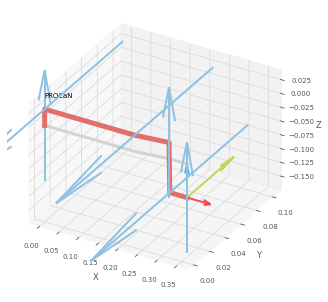

PyPlot3D backend, t = 0.05, scene:
  PROCaN

<Figure size 432x288 with 0 Axes>

In [19]:
q = [0,0,pi,-pi/2,pi,-pi/2]
qr = [0,0,pi/2,0,0,0]
qz = [0,0,0,0,0,0]
pc.robot.plot(qz)

In [ ]:
import numpy as np
Pa = np.array([[2],[2],[2],[10]])
Pa = Pa/10
pc.T_func(0,0,0,pi)#,pi,-pi/2)@Pa

In [3]:
import roboticstoolbox as rtb
from spatialmath.base import *
from spatialmath import SE3

puma = rtb.models.DH.Puma560(symbolic=True)

In [2]:
print(puma)

DHRobot: Puma 560 (by Unimation), 6 joints (RRRRRR), dynamics, geometry, standard DH parameters
┌────┬────────┬────────┬───────┬─────────┬────────┐
│θⱼ  │   dⱼ   │   aⱼ   │  ⍺ⱼ   │   q⁻    │   q⁺   │
├────┼────────┼────────┼───────┼─────────┼────────┤
│ q1 │ 0.6718 │      0 │  pi/2 │ -160.0° │ 160.0° │
│ q2 │      0 │ 0.4318 │     0 │ -110.0° │ 110.0° │
│ q3 │   0.15 │ 0.0203 │ -pi/2 │ -135.0° │ 135.0° │
│ q4 │ 0.4318 │      0 │  pi/2 │ -266.0° │ 266.0° │
│ q5 │      0 │      0 │ -pi/2 │ -100.0° │ 100.0° │
│ q6 │      0 │      0 │     0 │ -266.0° │ 266.0° │
└────┴────────┴────────┴───────┴─────────┴────────┘

┌─┬──┐
└─┴──┘

┌─────┬─────┬──────────────────────┬───────────────────────┬─────┬──────────────────────┬─────┐
│name │ q0  │ q1                   │ q2                    │ q3  │ q4                   │ q5  │
├─────┼─────┼──────────────────────┼───────────────────────┼─────┼──────────────────────┼─────┤
│  qr │  0° │ 28.6478897565412*pi° │ -28.6478897565412*pi° │  0° │  0°          

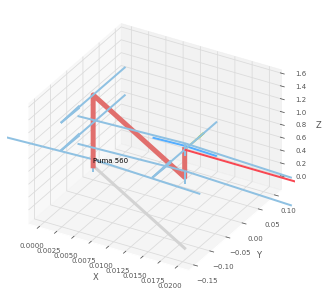

PyPlot3D backend, t = 0.05, scene:
  Puma 560

<Figure size 432x288 with 0 Axes>

In [3]:
puma.plot(puma.qr)
#puma.plot([-0.5,0,0.5,0.5,0,-0.5])

In [ ]:
puma.plot(puma.qz)
#puma.plot([-0.5,0,0.5,0.5,0,-0.5])

In [7]:
panda = rtb.models.Panda()
panda.plot(panda.q,block=True)

KeyboardInterrupt: 

In [ ]:
import roboticstoolbox as rtb

robot = rtb.models.DH.Panda()  # create a robot

pyplot = rtb.backends.PyPlot.PyPlot()  # create a PyPlot backend
pyplot.add(robot)              # add the robot to the backend
robot.q = robot.qz             # set the robot configuration
pyplot.step()                  # update the backend and graphical view

ERobot: PROCaN, 6 joints (RRRRRR)
┌─────┬────────┬───────┬────────┬──────────────────────────────────────────────┐
│link │  link  │ joint │ parent │             ETS: parent to link              │
├─────┼────────┼───────┼────────┼──────────────────────────────────────────────┤
│   0 │ link1  │     0 │ BASE   │ tz(0.0294) ⊕ Rz(q0)                          │
│   1 │ link2  │     1 │ link1  │ Rx(90°) ⊕ Rz(q1)                             │
│   2 │ link3  │     2 │ link2  │ tx(0.23) ⊕ Rz(q2)                            │
│   3 │ link4  │     3 │ link3  │ tx(0.08173) ⊕ Ry(-90°) ⊕ Rz(q3)              │
│   4 │ link5  │     4 │ link4  │ tx(-0.0019) ⊕ tz(-0.0904) ⊕ Rx(90°) ⊕ Rz(q4) │
│   5 │ @link6 │     5 │ link5  │ tx(0.0438) ⊕ Ry(90°) ⊕ Rz(q5)                │
└─────┴────────┴───────┴────────┴──────────────────────────────────────────────┘



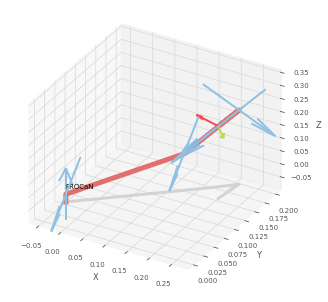

<Figure size 432x288 with 0 Axes>

In [1]:
import roboticstoolbox as rtb
from roboticstoolbox import ET, ETS, ERobot
from sympy import Matrix, nsimplify
from spatialmath.base import *
import spatialmath.base.symbolic as sym
import math

pi = math.pi

l0 = ET.tz(0.0294)*ET.Rz()
l1 = ET.Rx(pi/2)*ET.Rz()
l2 = ET.tx(0.23)*ET.Rz()
l3 = ET.tx(0.08173)*ET.Ry(-pi/2)*ET.Rz()
l4 = ET.tx(-0.0019)*ET.tz(-0.0904)*ET.Rx(pi/2)*ET.Rz()
l5 = ET.tx(0.0438)*ET.Ry(pi/2)*ET.Rz()

Link = rtb.robot.Link
link0 = Link(l0, name='link1')
link1 = Link(l1, name='link2', parent=link0)
link2 = Link(l2, name='link3', parent=link1)
link3 = Link(l3, name='link4', parent=link2)
link4 = Link(l4, name='link5', parent=link3)
link5 = Link(l5, name='link6', parent=link4)

procan = ERobot([link0,link1,link2,link3,link4,link5],name='PROCaN')

print(procan)
qr = [0,0,pi,1.57,pi,1.57]
q30 = [0.5,0.5,0.5,0.5,0.5,0.5]
procan.plot(q30)
q = sym.symbol('ϴ_:6')#_:6')
#q = sym.symbol('φ,ϴ,ψ,α,β,γ')
T = procan.fkine(q)

In [2]:
Ts = T.simplify()

In [28]:
M = Matrix(Ts.A)
Ms = nsimplify(M,tolerance=1e-4)
Ms

Matrix([
[-(sin(ϴ_3)*cos(ϴ_5) + sin(ϴ_4)*sin(ϴ_5)*cos(ϴ_3))*sin(ϴ_0) - (-sin(ϴ_3)*sin(ϴ_4)*sin(ϴ_5)*sin(ϴ_1 + ϴ_2) + sin(ϴ_5)*cos(ϴ_4)*cos(ϴ_1 + ϴ_2) + sin(ϴ_1 + ϴ_2)*cos(ϴ_3)*cos(ϴ_5))*cos(ϴ_0),  (sin(ϴ_3)*sin(ϴ_5) - sin(ϴ_4)*cos(ϴ_3)*cos(ϴ_5))*sin(ϴ_0) - (-sin(ϴ_3)*sin(ϴ_4)*sin(ϴ_1 + ϴ_2)*cos(ϴ_5) - sin(ϴ_5)*sin(ϴ_1 + ϴ_2)*cos(ϴ_3) + cos(ϴ_4)*cos(ϴ_5)*cos(ϴ_1 + ϴ_2))*cos(ϴ_0), -(sin(ϴ_3)*sin(ϴ_1 + ϴ_2)*cos(ϴ_4) + sin(ϴ_4)*cos(ϴ_1 + ϴ_2))*cos(ϴ_0) + sin(ϴ_0)*cos(ϴ_3)*cos(ϴ_4), -(-219*cos(ϴ_3)*cos(ϴ_4)/5000 + 19*cos(ϴ_3)/10000)*sin(ϴ_0) - (219*sin(ϴ_3)*sin(ϴ_1 + ϴ_2)*cos(ϴ_4)/5000 - 19*sin(ϴ_3)*sin(ϴ_1 + ϴ_2)/10000 + 219*sin(ϴ_4)*cos(ϴ_1 + ϴ_2)/5000 - 23*cos(ϴ_1)/100 - 1234*cos(ϴ_1 + ϴ_2)/7169)*cos(ϴ_0)],
[ (sin(ϴ_3)*cos(ϴ_5) + sin(ϴ_4)*sin(ϴ_5)*cos(ϴ_3))*cos(ϴ_0) - (-sin(ϴ_3)*sin(ϴ_4)*sin(ϴ_5)*sin(ϴ_1 + ϴ_2) + sin(ϴ_5)*cos(ϴ_4)*cos(ϴ_1 + ϴ_2) + sin(ϴ_1 + ϴ_2)*cos(ϴ_3)*cos(ϴ_5))*sin(ϴ_0), -(sin(ϴ_3)*sin(ϴ_5) - sin(ϴ_4)*cos(ϴ_3)*cos(ϴ_5))*cos(ϴ_0) - (-sin(ϴ_3)*sin(ϴ_4)*sin(ϴ_1 + ϴ_2)*co

In [44]:
Ms[11]

23*sin(ϴ_1)/100 + 219*sin(ϴ_3)*cos(ϴ_4)*cos(ϴ_1 + ϴ_2)/5000 - 19*sin(ϴ_3)*cos(ϴ_1 + ϴ_2)/10000 - 219*sin(ϴ_4)*sin(ϴ_1 + ϴ_2)/5000 + 1234*sin(ϴ_1 + ϴ_2)/7169 + 147/5000

In [45]:
from sympy import lambdify
T_func = lambdify(q, Ms, modules='numpy')
T_func(0,0,pi,1.57,pi,1.57)
Ms[:3,3]

Matrix([
[-(-219*cos(ϴ_3)*cos(ϴ_4)/5000 + 19*cos(ϴ_3)/10000)*sin(ϴ_0) - (219*sin(ϴ_3)*sin(ϴ_1 + ϴ_2)*cos(ϴ_4)/5000 - 19*sin(ϴ_3)*sin(ϴ_1 + ϴ_2)/10000 + 219*sin(ϴ_4)*cos(ϴ_1 + ϴ_2)/5000 - 23*cos(ϴ_1)/100 - 1234*cos(ϴ_1 + ϴ_2)/7169)*cos(ϴ_0)],
[ (-219*cos(ϴ_3)*cos(ϴ_4)/5000 + 19*cos(ϴ_3)/10000)*cos(ϴ_0) - (219*sin(ϴ_3)*sin(ϴ_1 + ϴ_2)*cos(ϴ_4)/5000 - 19*sin(ϴ_3)*sin(ϴ_1 + ϴ_2)/10000 + 219*sin(ϴ_4)*cos(ϴ_1 + ϴ_2)/5000 - 23*cos(ϴ_1)/100 - 1234*cos(ϴ_1 + ϴ_2)/7169)*sin(ϴ_0)],
[                                                              23*sin(ϴ_1)/100 + 219*sin(ϴ_3)*cos(ϴ_4)*cos(ϴ_1 + ϴ_2)/5000 - 19*sin(ϴ_3)*cos(ϴ_1 + ϴ_2)/10000 - 219*sin(ϴ_4)*sin(ϴ_1 + ϴ_2)/5000 + 1234*sin(ϴ_1 + ϴ_2)/7169 + 147/5000]])

In [46]:
from spatialmath.base import *
from spatialmath import SE3
import numpy as np
Pa = np.array([[2],[2],[2],[10]])
Pa = Pa/10
I = np.eye(4)
I = np.insert(I,3,[0.2,0.2,0.2,1],axis=1)
Pa = np.delete(I,4,1)
Pa = SE3(0.2,0.2,0.2)
xis,ips,zed = sym.symbol('x,y,z')
Pq = SE3(xis,ips,zed)
#Ms*Pa
#print(Pa)
Pq

   1         0         0        x             
   0         1         0        y             
   0         0         1        z             
   0         0         0         1         


In [ ]:
pose = procan.fkine_all(q)
desloc = pose
desloc

In [56]:
#https://github.com/petercorke/robotics-toolbox-python/wiki/Kinematics
sol = procan.ikine_LMS(Pa)
sol

IKsolution(q=array([ 0.78539817,  1.00042759, -1.38786285,  1.57079633,  0.38743529,
       -2.3561945 ]), success=True, reason=None, iterations=13, residual=2.3029126401587954e-12)

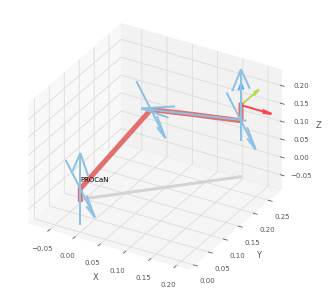

PyPlot3D backend, t = 0.05, scene:
  PROCaN

<Figure size 432x288 with 0 Axes>

In [10]:
procan.plot(sol[0])

In [11]:
#retorna os angulos das juntas em graus
for item in sol[0]:
    print((item/3.1415)*180)

45.00132765349501
57.321969274360484
-79.52102891486904
90.00265441062916
22.199061418637218
-135.0039820809895


In [10]:
J = procan.jacob0(q)
J = nsimplify(J,tolerance=1e-4,rational=True)
J[0]

[-(((-((1234/7169 - 219*sin(ϴ_4)/5000)*sin(ϴ_2) + (219*cos(ϴ_4)/5000 - 19/10000)*sin(ϴ_3)*cos(ϴ_2))*sin(ϴ_1) + ((1234/7169 - 219*sin(ϴ_4)/5000)*cos(ϴ_2) - (219*cos(ϴ_4)/5000 - 19/10000)*sin(ϴ_2)*sin(ϴ_3) + 23/100)*cos(ϴ_1))*sin(ϴ_0) - (219*cos(ϴ_4)/5000 - 19/10000)*cos(ϴ_0)*cos(ϴ_3))*sin(ϴ_0) + ((-((1234/7169 - 219*sin(ϴ_4)/5000)*sin(ϴ_2) + (219*cos(ϴ_4)/5000 - 19/10000)*sin(ϴ_3)*cos(ϴ_2))*sin(ϴ_1) + ((1234/7169 - 219*sin(ϴ_4)/5000)*cos(ϴ_2) - (219*cos(ϴ_4)/5000 - 19/10000)*sin(ϴ_2)*sin(ϴ_3) + 23/100)*cos(ϴ_1))*cos(ϴ_0) + (219*cos(ϴ_4)/5000 - 19/10000)*sin(ϴ_0)*cos(ϴ_3))*cos(ϴ_0))*sin(ϴ_0) - (((-((1234/7169 - 219*sin(ϴ_4)/5000)*sin(ϴ_2) + (219*cos(ϴ_4)/5000 - 19/10000)*sin(ϴ_3)*cos(ϴ_2))*sin(ϴ_1) + ((1234/7169 - 219*sin(ϴ_4)/5000)*cos(ϴ_2) - (219*cos(ϴ_4)/5000 - 19/10000)*sin(ϴ_2)*sin(ϴ_3) + 23/100)*cos(ϴ_1))*sin(ϴ_0) - (219*cos(ϴ_4)/5000 - 19/10000)*cos(ϴ_0)*cos(ϴ_3))*cos(ϴ_0) - ((-((1234/7169 - 219*sin(ϴ_4)/5000)*sin(ϴ_2) + (219*cos(ϴ_4)/5000 - 19/10000)*sin(ϴ_3)*cos(ϴ_2))*sin(ϴ_1) +

In [ ]:
J[0]